<h3>Imports required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
import statsmodels.api as st
import numpy as np

### Load Data

In [2]:
#reading the csv file
data=pd.read_csv('telecom_churn_data.csv')

### Read Data

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
#describing the dataset
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
#creating copy of dataset
copy_data=data

In [6]:
#As we can form the result that we have total of 226 columns
len(data.columns)

226

In [7]:
#Segregating columns on the basis of type
obj_col=[]
number_col=[]
for col in data.columns:
    if data[col].dtype=='object':
        obj_col.append(col)
    if data[col].dtype=='int64' or data[col].dtype=='float64' :
        number_col.append(col)

In [8]:
#Checking total no of columns to validate
len(obj_col)

12

In [9]:
#Checking total no of columns to validate
len(number_col)

214

In [10]:
#Check for number of rows
len(data)

99999

In [11]:
#Checking for NA
for col in data.columns:
    print(col+": ",data[col].isna().sum())

mobile_number:  0
circle_id:  0
loc_og_t2o_mou:  1018
std_og_t2o_mou:  1018
loc_ic_t2o_mou:  1018
last_date_of_month_6:  0
last_date_of_month_7:  601
last_date_of_month_8:  1100
last_date_of_month_9:  1659
arpu_6:  0
arpu_7:  0
arpu_8:  0
arpu_9:  0
onnet_mou_6:  3937
onnet_mou_7:  3859
onnet_mou_8:  5378
onnet_mou_9:  7745
offnet_mou_6:  3937
offnet_mou_7:  3859
offnet_mou_8:  5378
offnet_mou_9:  7745
roam_ic_mou_6:  3937
roam_ic_mou_7:  3859
roam_ic_mou_8:  5378
roam_ic_mou_9:  7745
roam_og_mou_6:  3937
roam_og_mou_7:  3859
roam_og_mou_8:  5378
roam_og_mou_9:  7745
loc_og_t2t_mou_6:  3937
loc_og_t2t_mou_7:  3859
loc_og_t2t_mou_8:  5378
loc_og_t2t_mou_9:  7745
loc_og_t2m_mou_6:  3937
loc_og_t2m_mou_7:  3859
loc_og_t2m_mou_8:  5378
loc_og_t2m_mou_9:  7745
loc_og_t2f_mou_6:  3937
loc_og_t2f_mou_7:  3859
loc_og_t2f_mou_8:  5378
loc_og_t2f_mou_9:  7745
loc_og_t2c_mou_6:  3937
loc_og_t2c_mou_7:  3859
loc_og_t2c_mou_8:  5378
loc_og_t2c_mou_9:  7745
loc_og_mou_6:  3937
loc_og_mou_7:  3859
lo

### Filtering High value customers

In [11]:
data['total_rech_amt_6']

0         362
1          74
2         168
3         230
4         196
5         120
6         499
7        1580
8         437
9         220
10          0
11        366
12        110
13        507
14         60
15          0
16        570
17        816
18          0
19        154
20        437
21        600
22        255
23          0
24        440
25        256
26          0
27         60
28         90
29        196
         ... 
99969     148
99970     337
99971     110
99972       0
99973      27
99974     520
99975     120
99976     214
99977      40
99978       0
99979       0
99980     636
99981     252
99982     154
99983     220
99984     360
99985      97
99986     567
99987     193
99988     380
99989     236
99990      40
99991     120
99992      60
99993       0
99994      60
99995     110
99996     119
99997     381
99998     710
Name: total_rech_amt_6, Length: 99999, dtype: int64

In [12]:
#Calculating total recharge data amount for each month
data['total_rech_data_amt_6'] = data['av_rech_amt_data_6'] * data['total_rech_data_6']
data['total_rech_data_amt_7'] = data['av_rech_amt_data_7'] * data['total_rech_data_7']
data['total_rech_data_amt_8'] = data['av_rech_amt_data_8'] * data['total_rech_data_8']
data['total_rech_data_amt_9'] = data['av_rech_amt_data_9'] * data['total_rech_data_9']

In [13]:
#Checking for na in 6 and 7 month
data['total_rech_data_amt_6'].isna().sum()

74846

In [14]:
data['total_rech_amt_6'].isna().sum()


0

In [15]:
data['total_rech_amt_7'].isna().sum()

0

In [16]:
data['total_rech_data_amt_7'].isna().sum()

74428

In [17]:
col_del=['av_rech_amt_data_6','total_rech_data_6','av_rech_amt_data_7','total_rech_data_7','av_rech_amt_data_8','total_rech_data_8','av_rech_amt_data_9','total_rech_data_9']
data.drop(['av_rech_amt_data_6','total_rech_data_6'],axis=1,inplace=True)

<b>As we can see from the above result that we need to impute the data

In [18]:
# Replace NAN with 0
data['total_rech_amt_6'].fillna(0,inplace=True)
data['total_rech_data_amt_6'].fillna(0,inplace=True)
data['total_rech_amt_7'].fillna(0,inplace=True)
data['total_rech_data_amt_7'].fillna(0,inplace=True)

In [19]:
data['total_rech_amt_6'].isna().sum()

0

In [20]:
av_rech_6and7 = (data['total_rech_amt_6'] + data['total_rech_amt_7']+ data['total_rech_data_amt_6'] + data['total_rech_data_amt_7'])/2

In [21]:
#filtering the data based on percentile
percentile_70 = np.percentile(av_rech_6and7, 70.0)
print("70th percentile is : ", percentile_70)
hv_customer_data = data[av_rech_6and7 >= percentile_70]


70th percentile is :  478.0


In [22]:
#Checking no of rows
len(hv_customer_data)

30001

In [23]:
#Adding Churn colums
hv_customer_data['customer_churn'] =hv_customer_data.apply(lambda X: 1 if (X.total_ic_mou_9 == 0 and X.total_og_mou_9 == 0 and X.vol_2g_mb_9==0 and X.vol_3g_mb_9==0) else 0, axis=1)


C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
#Checking the dataframe
hv_customer_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,customer_churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,802,57.74,19.38,18.74,0.00,0.0,0.0,NaN,NaN,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,720,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0,0


### Checking the imbalance nature of the data

In [25]:
#Checking the imbalance nature of the data
print(len(hv_customer_data[hv_customer_data['customer_churn']==1]))
print(len(hv_customer_data))

2441
30001


In [26]:
copy_hv_customer_data=hv_customer_data

In [27]:
hv_customer_data.shape

(30001, 229)

### Data Preparation for modelling

<b>Creating new features

In [28]:
#Combining ARPU of data
data['arpu_data_6'] = hv_customer_data['arpu_3g_6'] + hv_customer_data['arpu_2g_6']
data['arpu_data_7'] = hv_customer_data['arpu_3g_7'] + hv_customer_data['arpu_2g_7']
data['arpu_data_8'] = hv_customer_data['arpu_3g_8'] + hv_customer_data['arpu_2g_8']
data['arpu_data_9'] = hv_customer_data['arpu_3g_9'] + hv_customer_data['arpu_2g_9']

#Combining vol of data
data['vol_mb_6'] = hv_customer_data['vol_2g_mb_6'] + hv_customer_data['vol_3g_mb_6']
data['vol_mb_7'] = hv_customer_data['vol_2g_mb_7'] + hv_customer_data['vol_3g_mb_7']
data['vol_mb_8'] = hv_customer_data['vol_2g_mb_8'] + hv_customer_data['vol_3g_mb_8']
data['vol_mb_9'] = hv_customer_data['vol_2g_mb_9'] + hv_customer_data['vol_3g_mb_9']

hv_customer_data.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
],axis=1)

hv_customer_data.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_2g_mb_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_9',
],axis=1)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,customer_churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,802,57.74,19.38,18.74,0.00,0.0,0.0,NaN,NaN,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,720,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0,0
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,977.020,...,1328,358.10,2706.83,1714.67,0.00,5285.0,20424.0,455.0,1814.0,0
38,7000815202,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,363.987,...,1155,0.00,0.00,0.00,0.00,0.0,0.0,NaN,207.0,0
41,7000721289,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,482.832,...,2010,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,0
48,7000294396,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1873.271,...,1265,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,0
53,7002188521,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,978.077,...,697,0.00,0.00,0.00,0.00,344.0,575.0,23.0,92.0,0


In [31]:
#Dropping 9 month column from the dataset as it will not be used for modelling
for col in hv_customer_data.columns:
    if '_9' in col:
        print('Dropping column name: ', col)
        hv_customer_data.drop(col, axis=1, inplace=True)

Dropping column name:  last_date_of_month_9
Dropping column name:  arpu_9
Dropping column name:  onnet_mou_9
Dropping column name:  offnet_mou_9
Dropping column name:  

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


roam_ic_mou_9
Dropping column name:  roam_og_mou_9
Dropping column name:  loc_og_t2t_mou_9
Dropping column name:  loc_og_t2m_mou_9
Dropping column name:  loc_og_t2f_mou_9
Dropping column name:  loc_og_t2c_mou_9
Dropping column name:  loc_og_mou_9
Dropping column name:  std_og_t2t_mou_9
Dropping column name:  std_og_t2m_mou_9
Dropping column name:  std_og_t2f_mou_9
Dropping column name:  std_og_t2c_mou_9
Dropping column name:  std_og_mou_9
Dropping column name:  isd_og_mou_9
Dropping column name:  spl_og_mou_9
Dropping column name:  og_others_9
Dropping column name:  total_og_mou_9
Dropping column name:  loc_ic_t2t_mou_9
Dropping column name:  loc_ic_t2m_mou_9
Dropping column name:  loc_ic_t2f_mou_9
Dropping column name:  loc_ic_mou_9
Dropping column name:  std_ic_t2t_mou_9
Dropping column name:  std_ic_t2m_mou_9
Dropping column name:  std_ic_t2f_mou_9
Dropping column name:  std_ic_t2o_mou_9
Dropping column name:  std_ic_mou_9
Dropping column name:  total_ic_mou_9
Dropping column name: 

In [32]:
hv_customer_data.shape

(30001, 174)

In [33]:
#Checking for single valued column
for col in hv_customer_data:
    if len(hv_customer_data[col].value_counts())==1:
        print('Dropping column name', col)
        hv_customer_data.drop(col, axis=1, inplace=True)

Dropping column name circle_id
Dropping column name loc_og_t2o_mou
Dropping column name std_og_t2o_mou
Dropping column name loc_ic_t2o_mou
Dropping column name last_date_of_month_6
Dropping column name last_date_of_month_7
Dropping column name last_date_of_month_8
Dropping column name std_og_t2c_mou_6
Dropping column name std_og_t2c_mou_7
Dropping column name std_og_t2c_mou_8
Dropping column name std_ic_t2o_mou_6
Dropping column name std_ic_t2o_mou_7
Dropping column name std_ic_t2o_mou_8


In [34]:
#checking affect of drop
hv_customer_data.shape

(30001, 161)

In [35]:
#Dropping column having 30% of null values
for col in hv_customer_data.columns:
    per=hv_customer_data[col].isna().sum()*100/len(hv_customer_data)
    if per>30:
        print('Dropping column name', col)
        hv_customer_data.drop(col, axis=1, inplace=True)
        

Dropping column name date_of_last_rech_data_6
Dropping column name date_of_last_rech_data_7
Dropping column name date_of_last_rech_data_8
Dropping column name total_rech_data_7
Dropping column name total_rech_data_8
Dropping column name max_rech_data_6
Dropping column name max_rech_data_7
Dropping column name max_rech_data_8
Dropping column name count_rech_2g_6
Dropping column name count_rech_2g_7
Dropping column name count_rech_2g_8
Dropping column name count_rech_3g_6
Dropping column name count_rech_3g_7
Dropping column name count_rech_3g_8
Dropping column name av_rech_amt_data_7
Dropping column name av_rech_amt_data_8
Dropping column name arpu_3g_6
Dropping column name arpu_3g_7
Dropping column name arpu_3g_8
Dropping column name arpu_2g_6
Dropping column name arpu_2g_7
Dropping column name arpu_2g_8
Dropping column name night_pck_user_6
Dropping column name night_pck_user_7
Dropping column name night_pck_user_8
Dropping column name fb_user_6
Dropping column name fb_user_7
Dropping 

In [36]:
hv_customer_data.shape

(30001, 132)

In [37]:
hv_customer_data.isna().sum()

mobile_number               0
arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6               545
onnet_mou_7               537
onnet_mou_8              1174
offnet_mou_6              545
offnet_mou_7              537
offnet_mou_8             1174
roam_ic_mou_6             545
roam_ic_mou_7             537
roam_ic_mou_8            1174
roam_og_mou_6             545
roam_og_mou_7             537
roam_og_mou_8            1174
loc_og_t2t_mou_6          545
loc_og_t2t_mou_7          537
loc_og_t2t_mou_8         1174
loc_og_t2m_mou_6          545
loc_og_t2m_mou_7          537
loc_og_t2m_mou_8         1174
loc_og_t2f_mou_6          545
loc_og_t2f_mou_7          537
loc_og_t2f_mou_8         1174
loc_og_t2c_mou_6          545
loc_og_t2c_mou_7          537
loc_og_t2c_mou_8         1174
loc_og_mou_6              545
loc_og_mou_7              537
                         ... 
date_of_last_rech_8       583
last_day_rch_amt_6          0
last_day_r

In [38]:
for col in hv_customer_data.columns:
    if hv_customer_data[col].dtype=='int64' or hv_customer_data[col].dtype=='float64' :
        mean=hv_customer_data[col].mean()
        if hv_customer_data[col].isna().sum()>0:
            hv_customer_data.fillna(mean,inplace=True)

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [39]:
hv_customer_data['onnet_mou_6'].isna().sum()

0

In [40]:
hv_customer_data.isna().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
                        ..
date_of_last_rech_8      0
last_day_rch_amt_6       0
last_day_rch_amt_7       0
last_day_rch_amt_8       0
vol_2g_mb_6              0
vol_2g_mb_7              0
v

In [41]:
hv_customer_data.shape

(30001, 132)

In [42]:
hv_customer_data.drop(['mobile_number'],axis=1,inplace=True)

<h3>Exploratory Data Analysis [EDA]

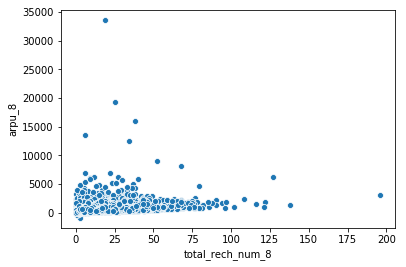

In [43]:
sns.scatterplot(hv_customer_data['total_rech_num_8'],hv_customer_data['arpu_8'])
plt.show()

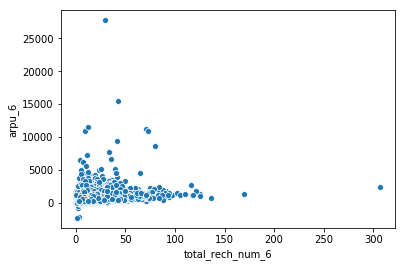

In [44]:
sns.scatterplot(hv_customer_data['total_rech_num_6'],hv_customer_data['arpu_6'])
plt.show()

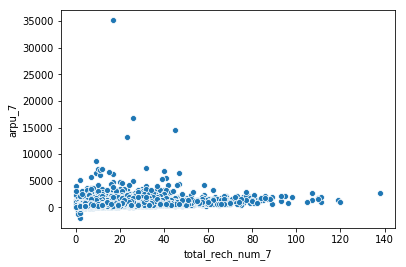

In [45]:
sns.scatterplot(hv_customer_data['total_rech_num_7'],hv_customer_data['arpu_7'])
plt.show()

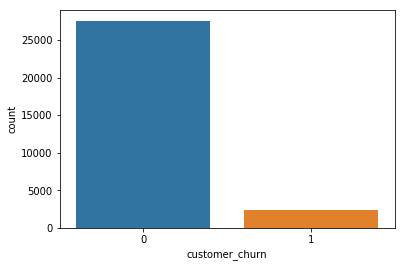

In [46]:
sns.countplot(hv_customer_data['customer_churn'])
plt.show()

As we can see from the above result that our customer_churn feature is highly imbalance so we need to take measures according to that

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


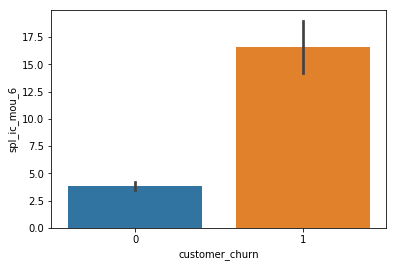

In [47]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_ic_mou_6'])
plt.show()

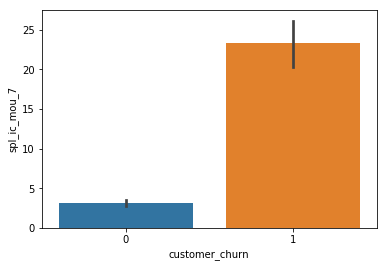

In [48]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_ic_mou_7'])
plt.show()

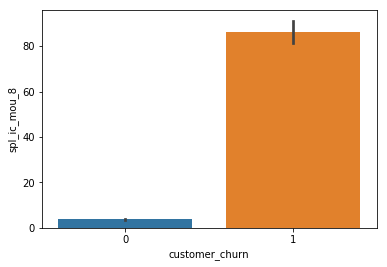

In [49]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_ic_mou_8'])
plt.show()

As we can see from above three plots that Special Incoming Call [Minute of usage-voice call] is increasing for the customer who are classifed as churn

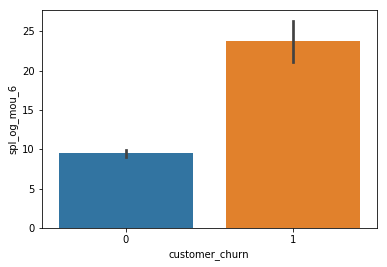

In [50]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_og_mou_6'])
plt.show()

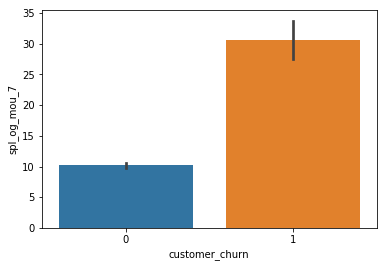

In [51]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_og_mou_7'])
plt.show()

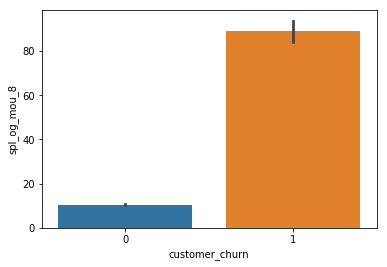

In [52]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_og_mou_8'])
plt.show()

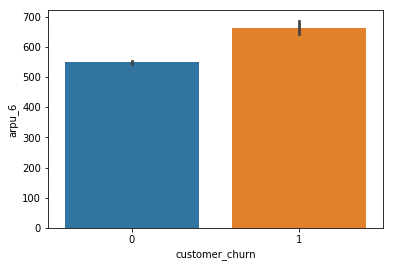

In [53]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['arpu_6'])
plt.show()

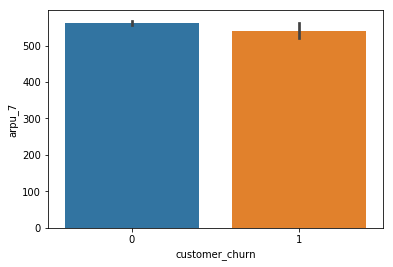

In [54]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['arpu_7'])
plt.show()

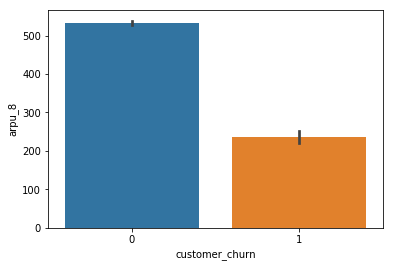

In [55]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['arpu_8'])
plt.show()

As we can see that Average revenue per user is decreasing for the user who are classified as churn. For the 6 month churn user are contributiing more than non churn user.

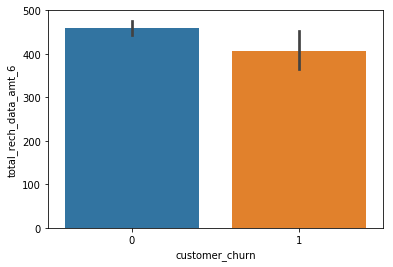

In [56]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['total_rech_data_amt_6'])
plt.show()

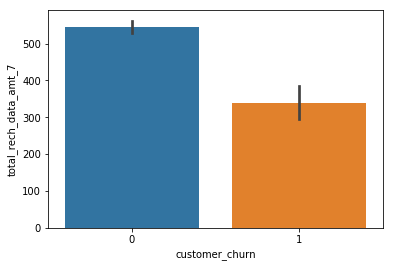

In [57]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['total_rech_data_amt_7'])
plt.show()

From the above two graph we can see that total recharge data amount was decreasing for the user who are classifed as churn

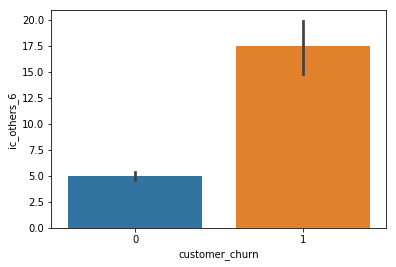

In [58]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['ic_others_6'])
plt.show()

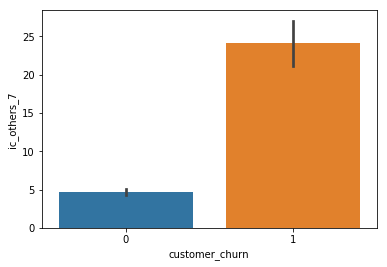

In [59]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['ic_others_7'])
plt.show()

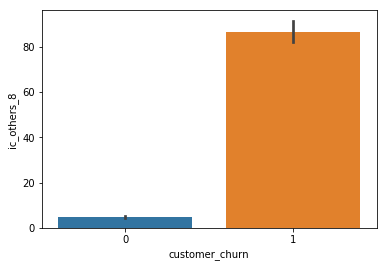

In [60]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['ic_others_8'])
plt.show()

As we can see from the above result incoming others is getting increased for the customer that are identified as churn

<b> As we can see from the above result that our data set is imbalance

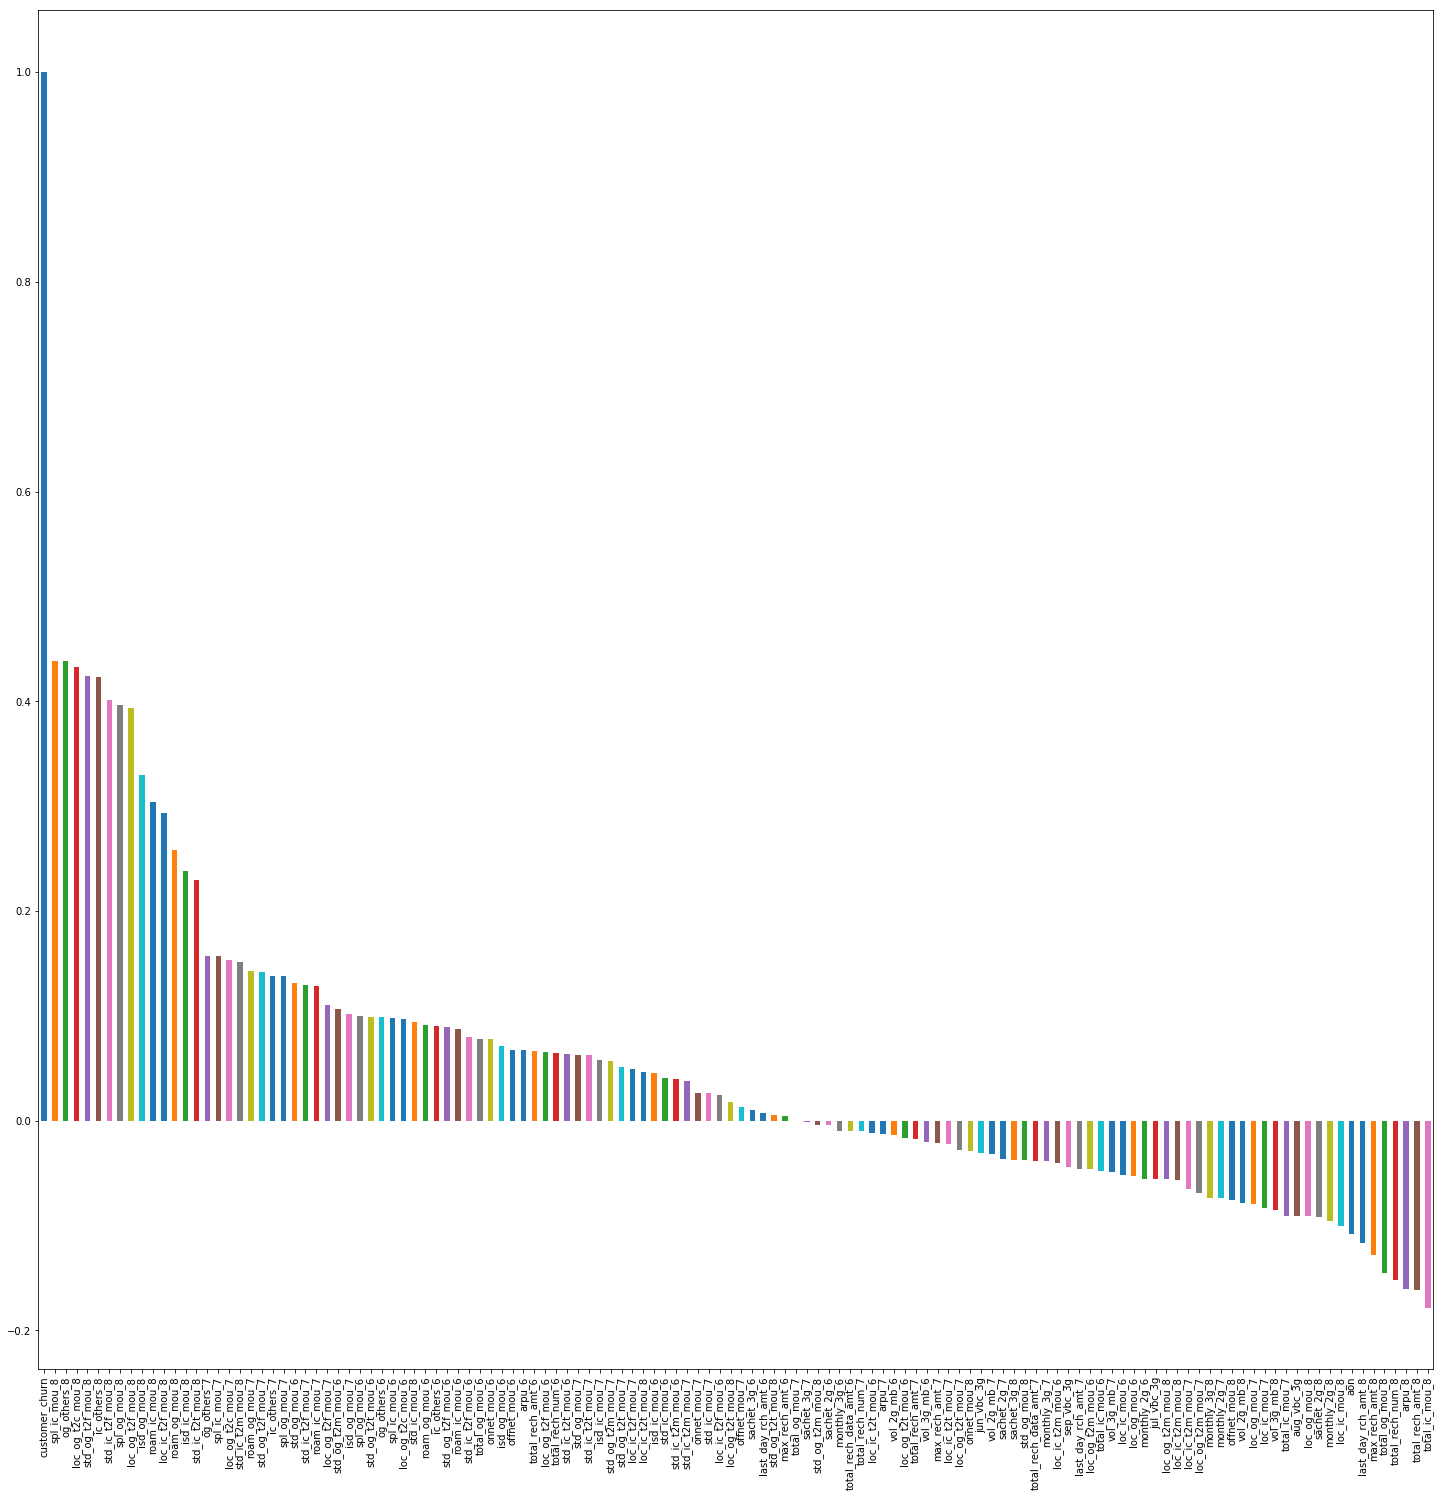

In [61]:
plt.figure(figsize=(25,25))
hv_customer_data.corr()['customer_churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

As we can see the highly correlated columns<br>
<b>Positive Correlation</b>
    <li>spl_ic_mou_8
    <li>og_others_8
    <li>loc_og_t2c_mou_8<br>
<b>Negative Correlation</b>
    <li>total_rech_amt_8
    <li>arpu_8
    <li>total_ic_mou_8


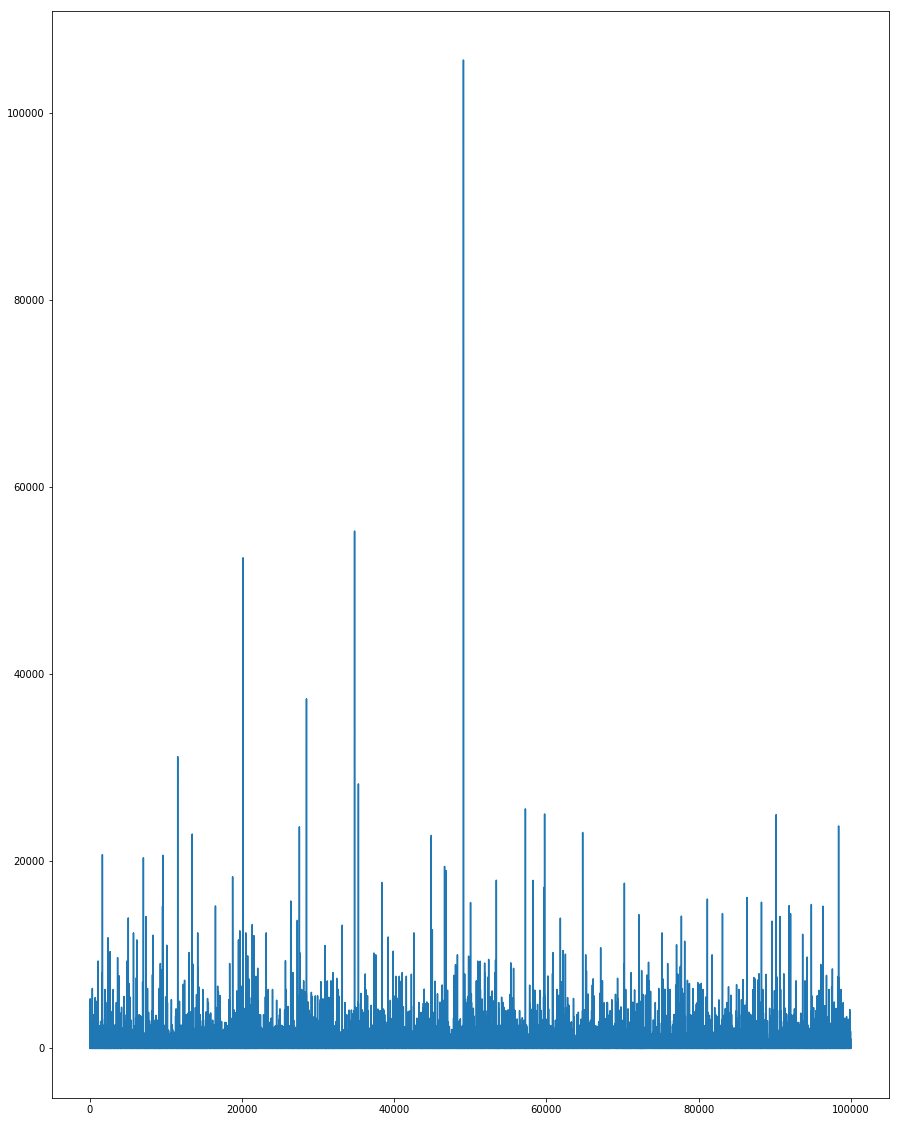

In [62]:
plt.figure(figsize=(15,20))
plt.plot(hv_customer_data['total_rech_data_amt_6'])
plt.show()

In [63]:
#dropping of date column as it is of no use

col_del=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
hv_customer_data.drop(col_del,axis=1,inplace=True)

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [64]:
hv_customer_data.shape

(30001, 125)

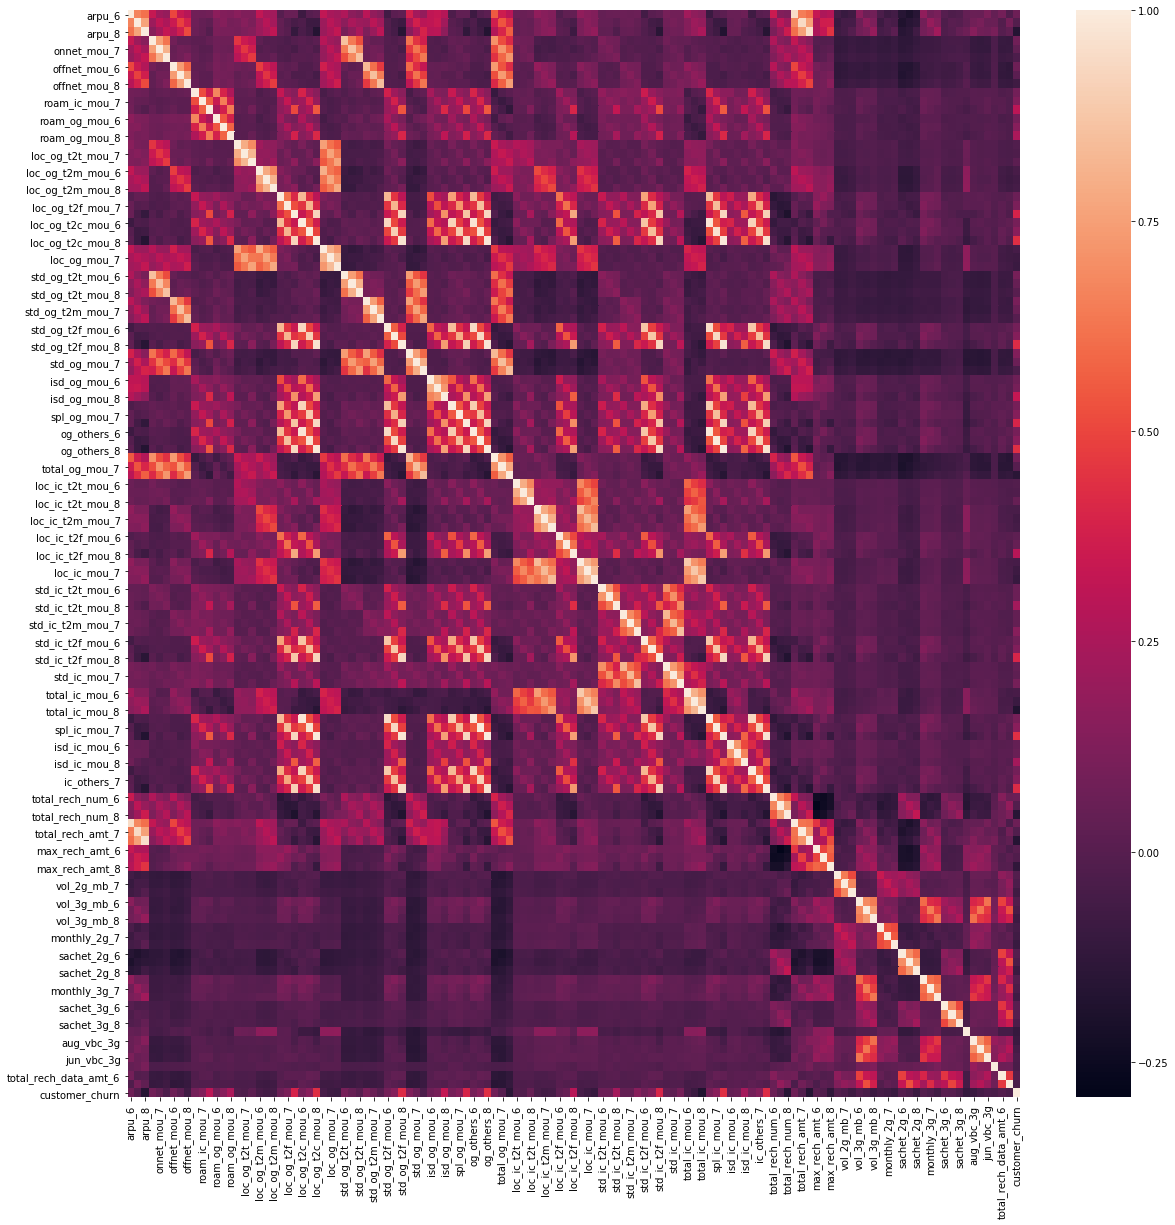

In [65]:
#Heat Map
plt.figure(figsize=(20,20))
sns.heatmap(hv_customer_data.corr())
plt.show()

In [66]:
#Seprating the dataset
X = hv_customer_data.drop(['customer_churn'], axis=1)
Y=hv_customer_data['customer_churn']

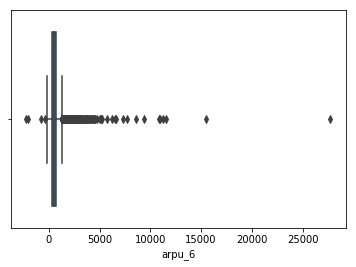

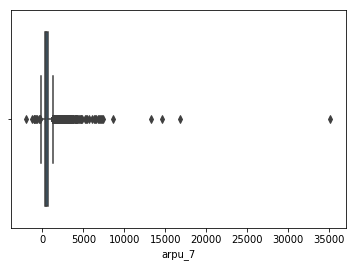

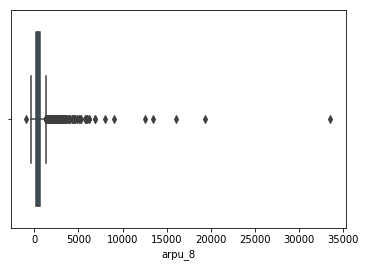

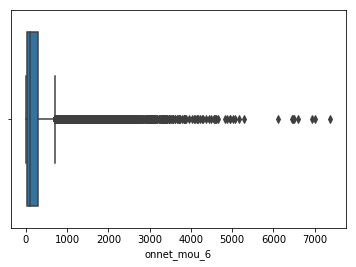

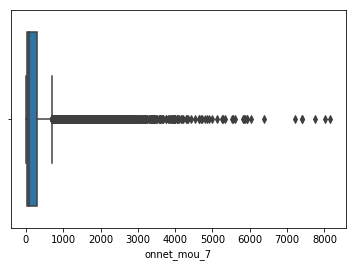

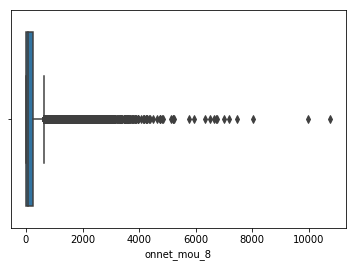

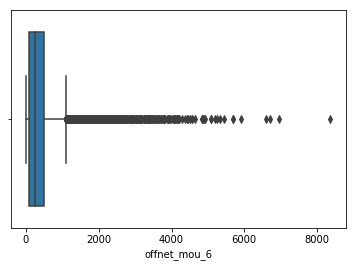

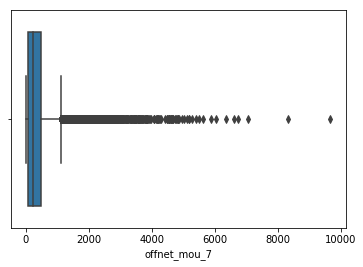

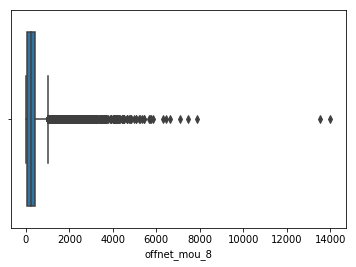

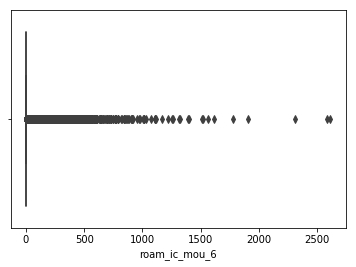

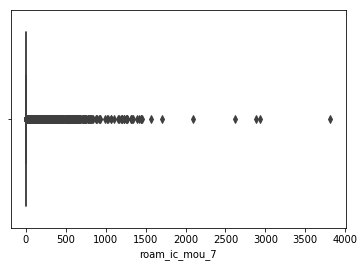

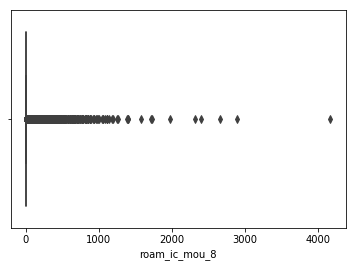

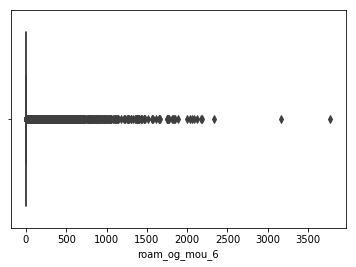

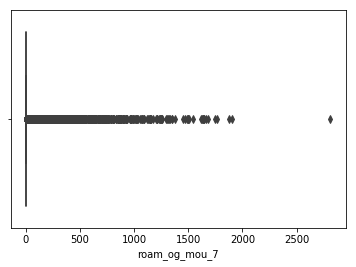

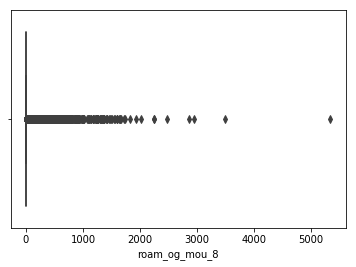

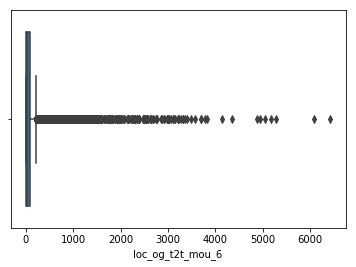

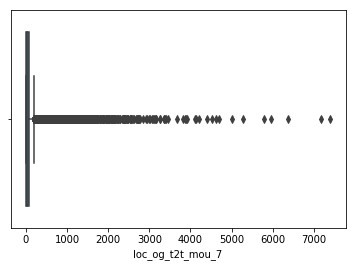

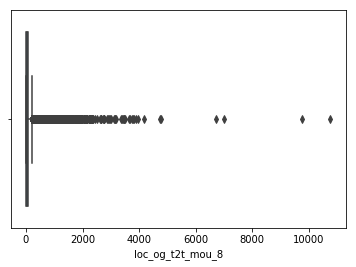

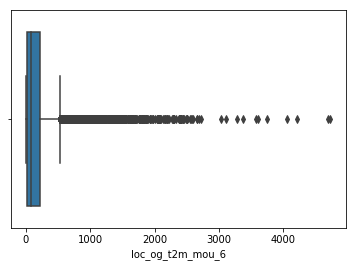

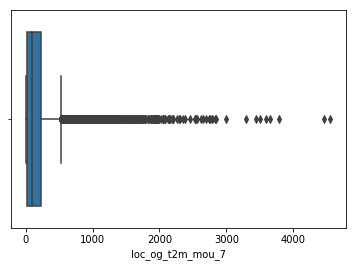

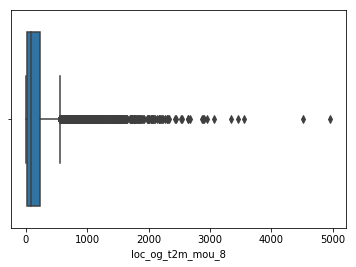

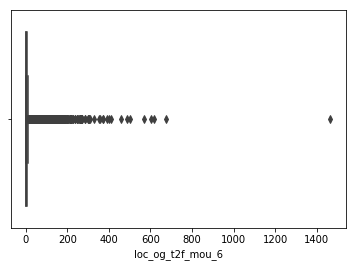

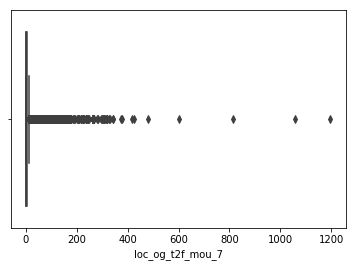

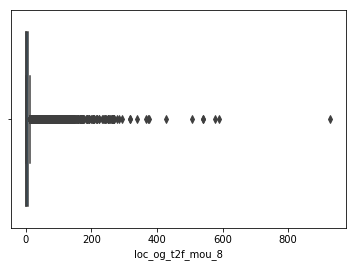

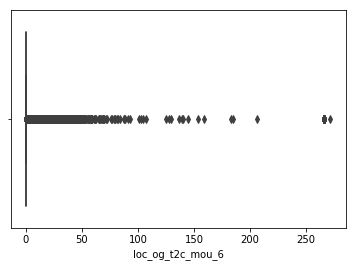

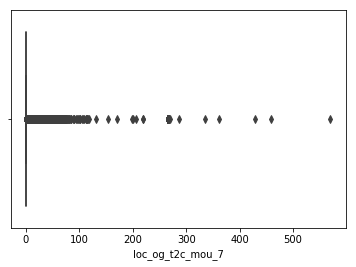

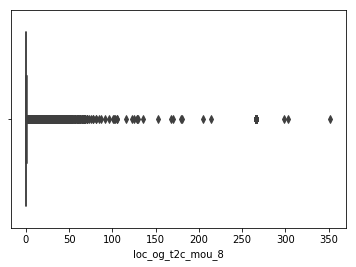

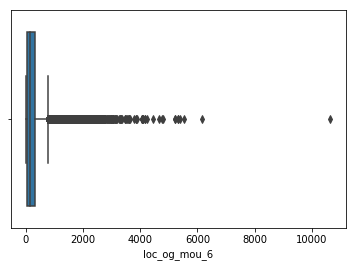

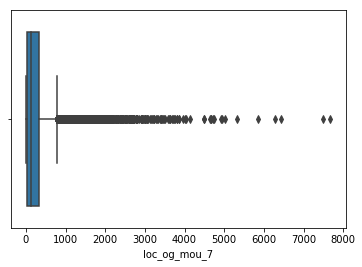

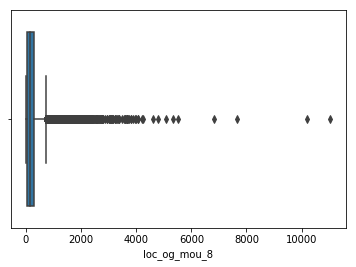

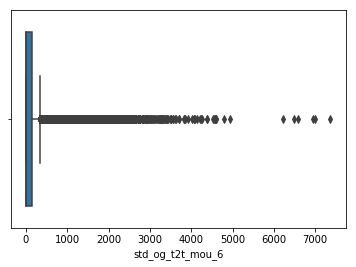

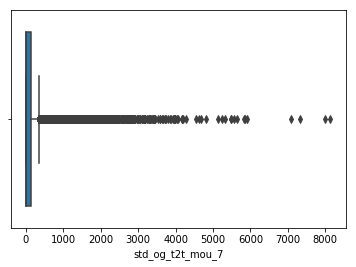

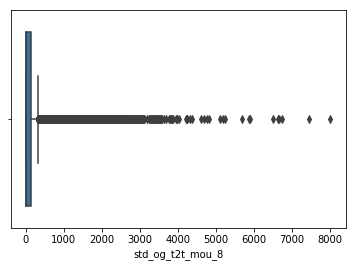

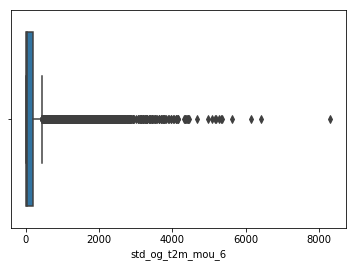

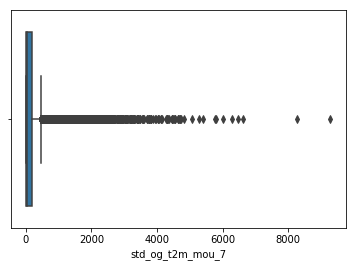

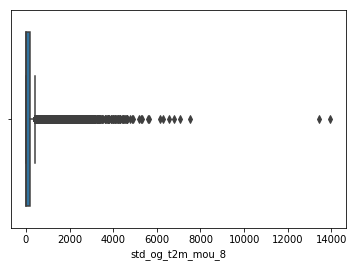

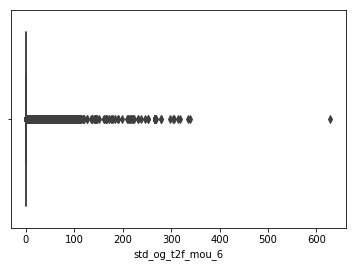

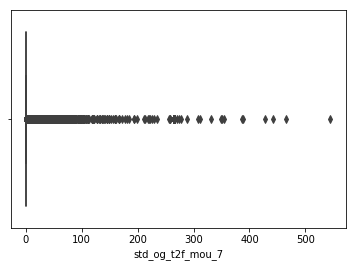

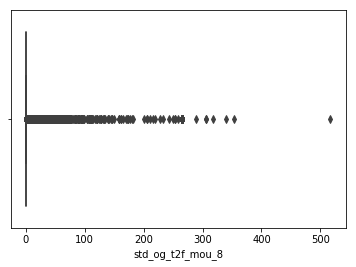

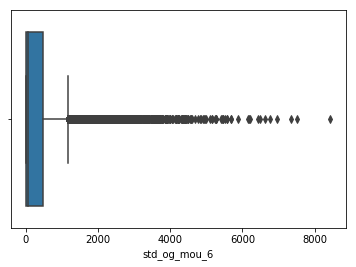

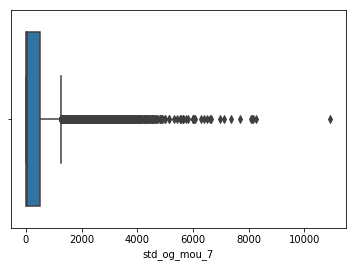

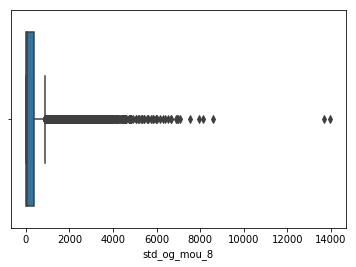

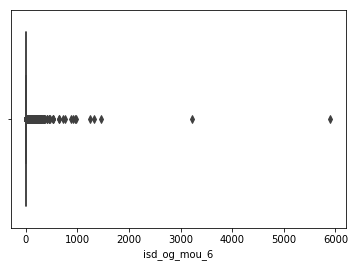

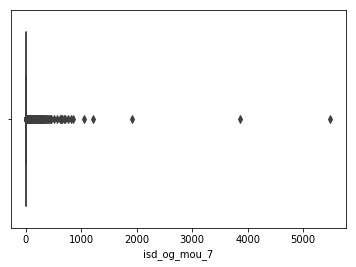

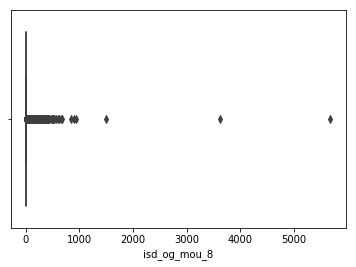

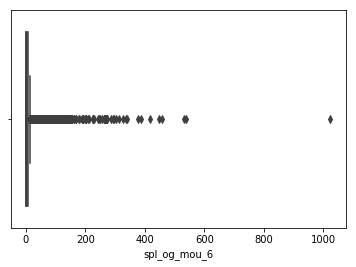

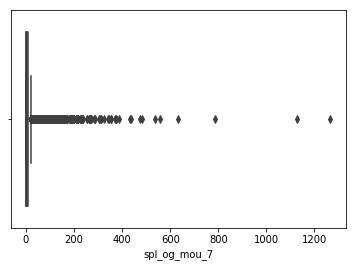

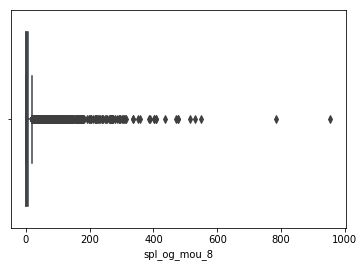

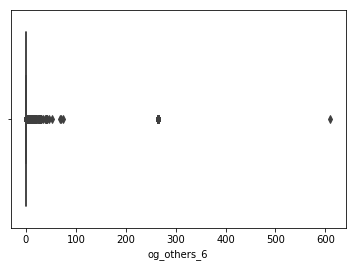

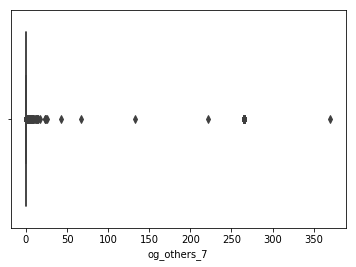

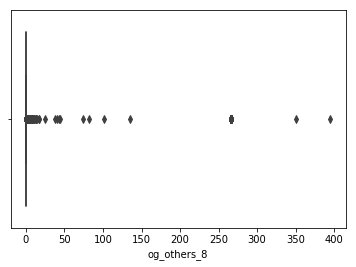

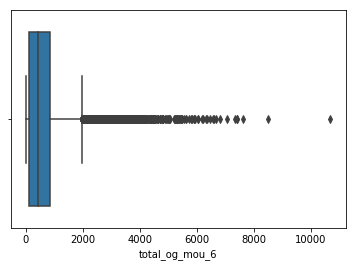

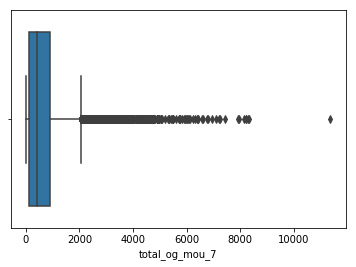

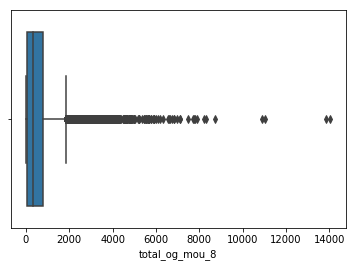

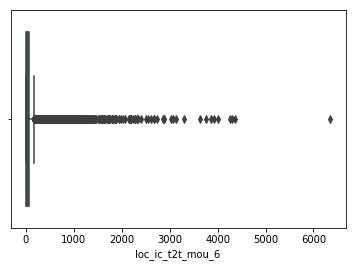

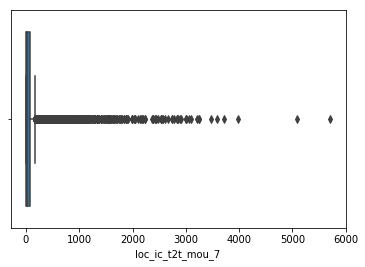

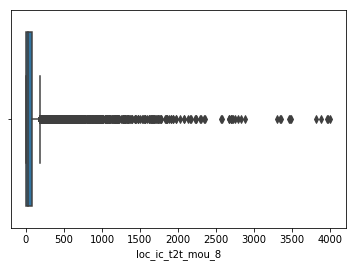

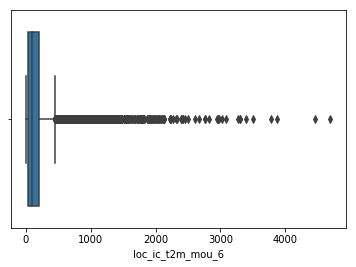

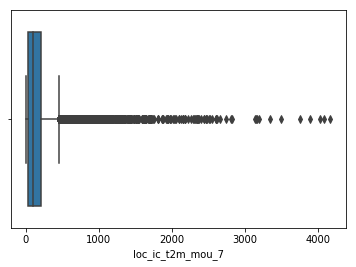

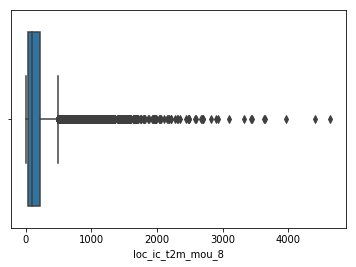

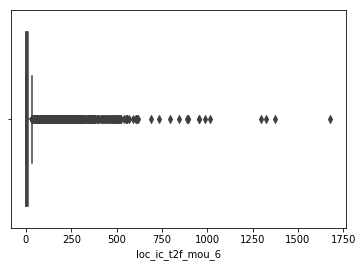

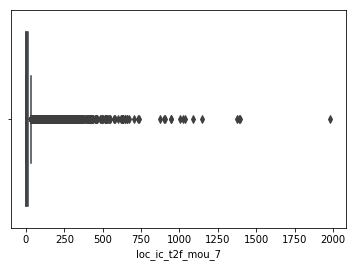

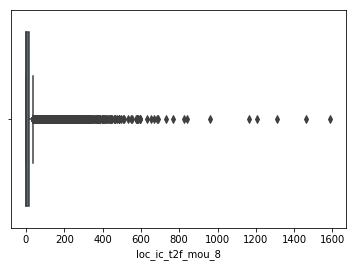

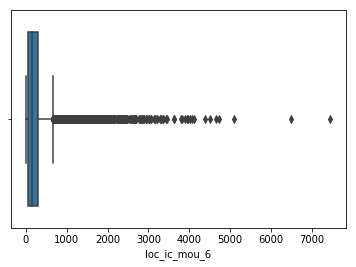

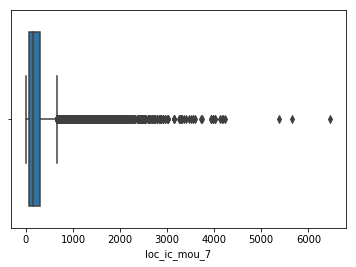

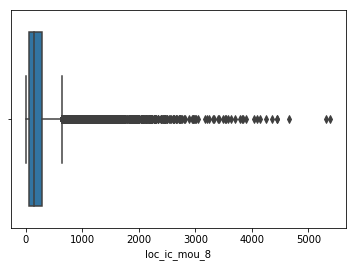

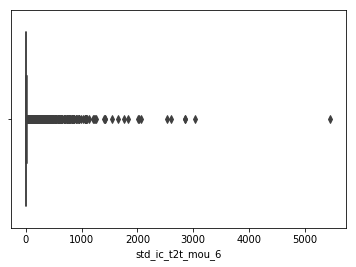

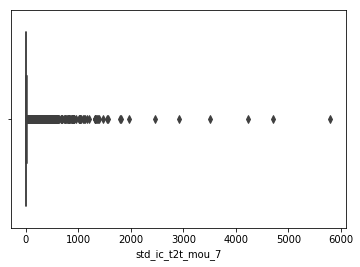

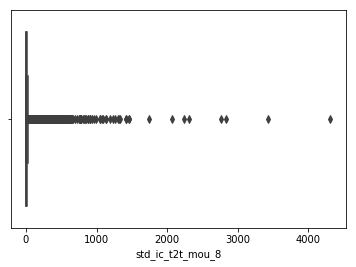

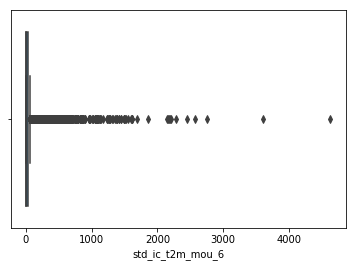

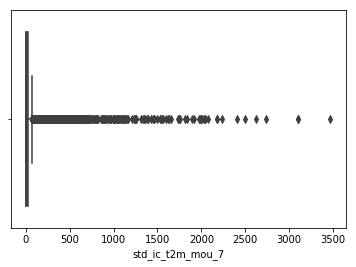

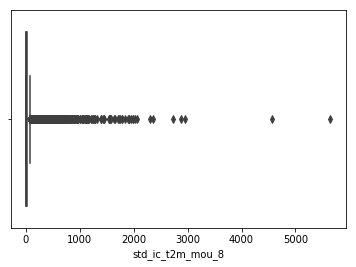

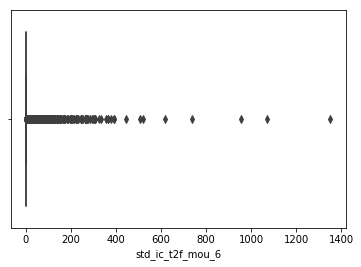

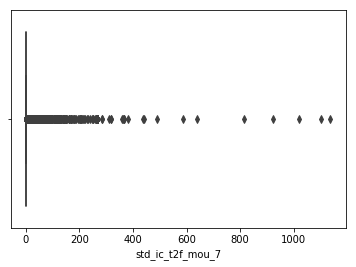

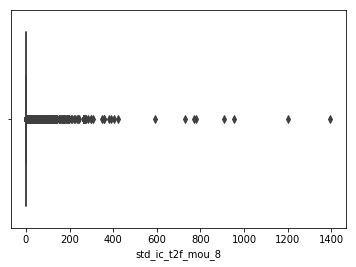

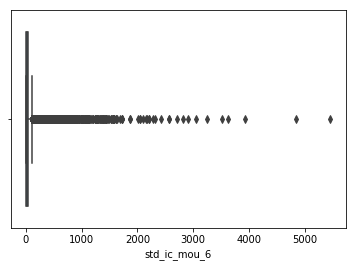

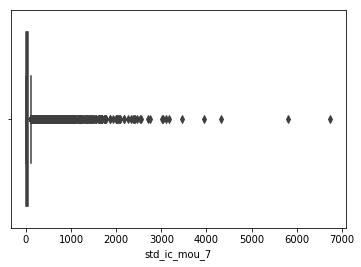

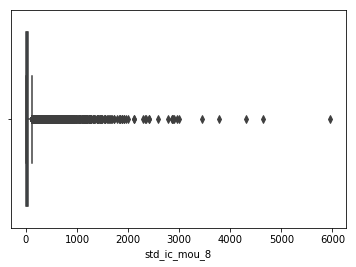

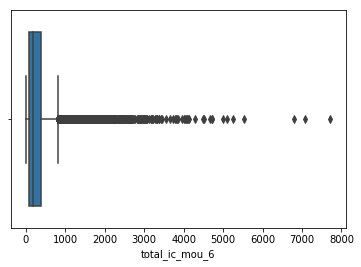

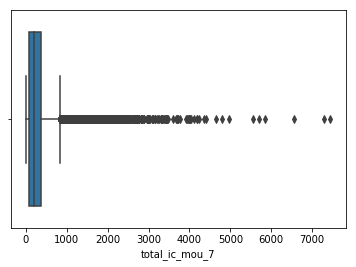

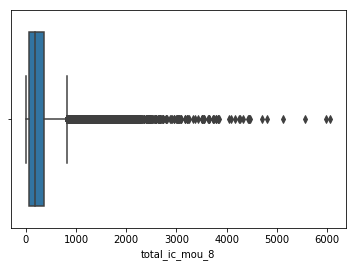

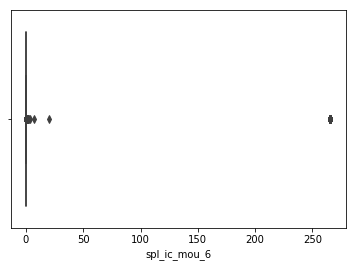

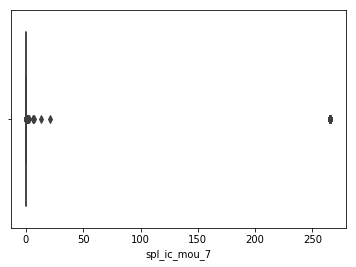

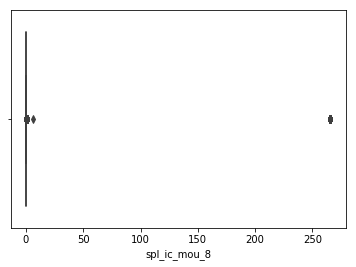

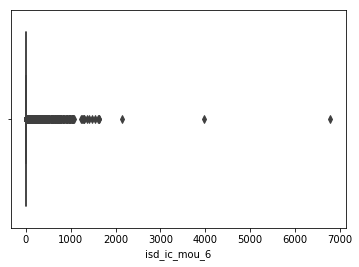

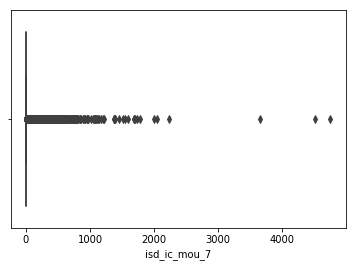

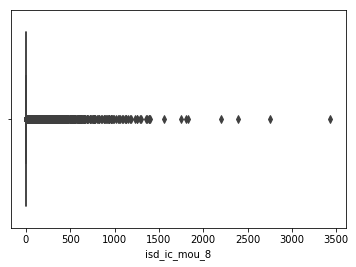

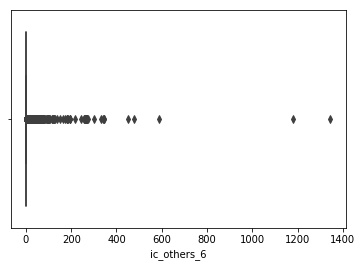

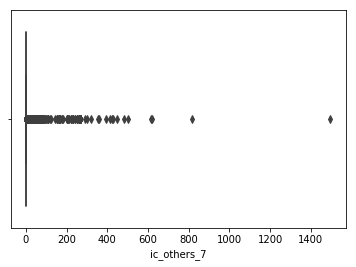

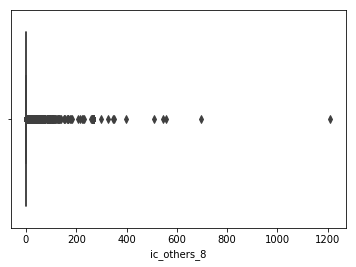

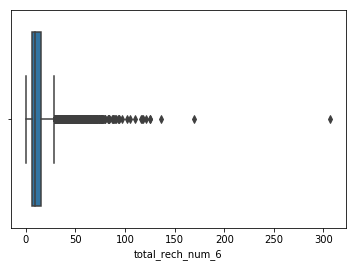

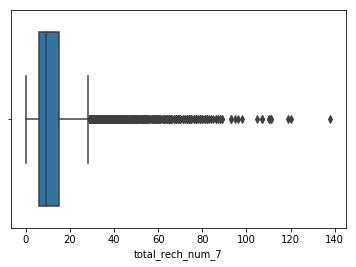

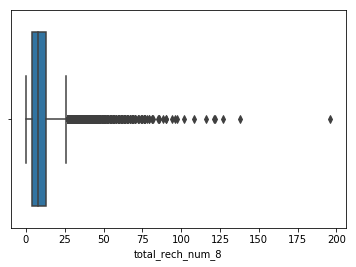

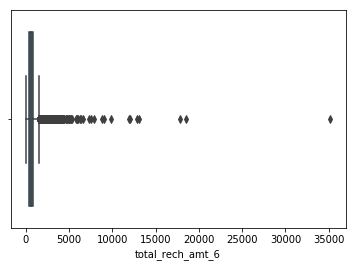

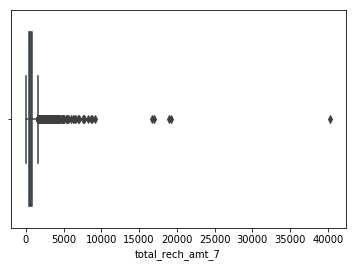

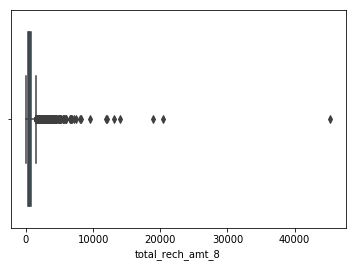

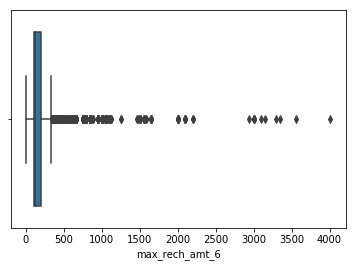

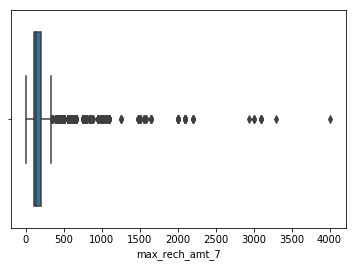

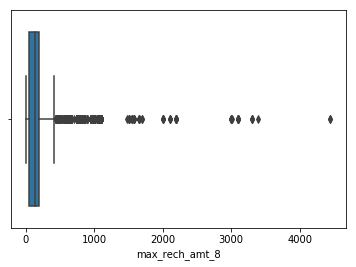

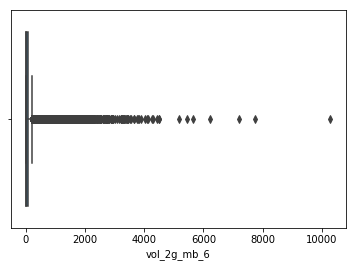

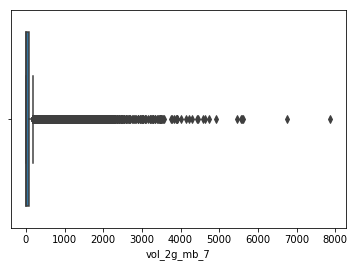

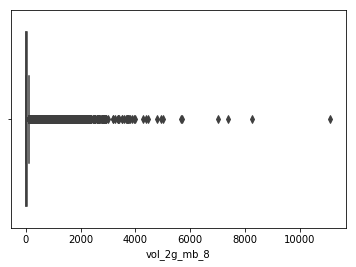

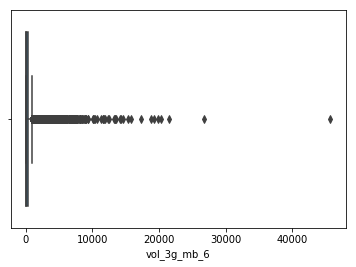

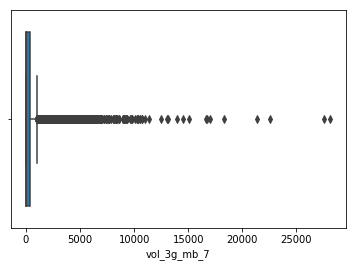

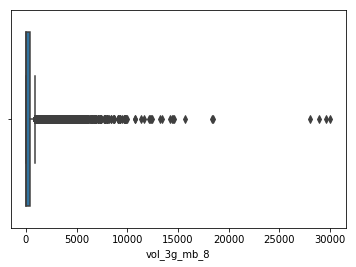

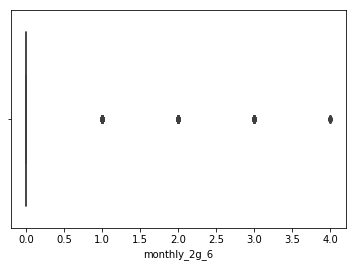

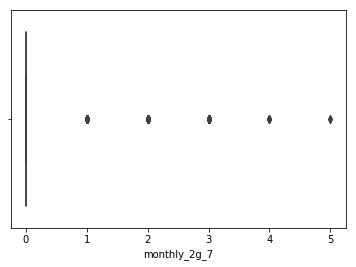

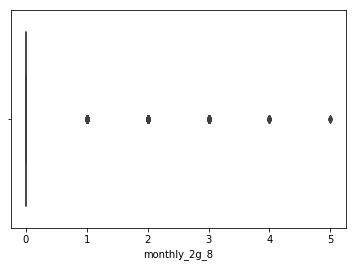

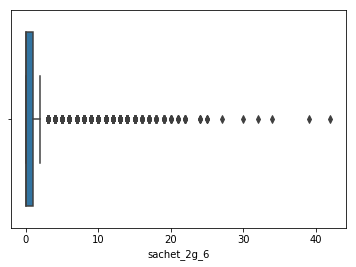

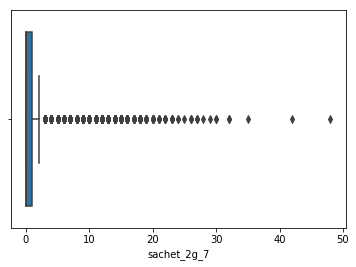

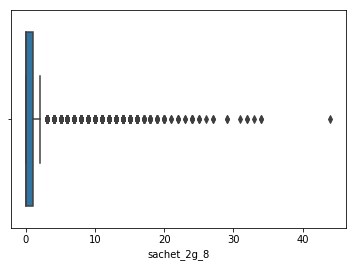

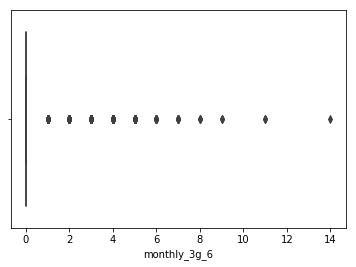

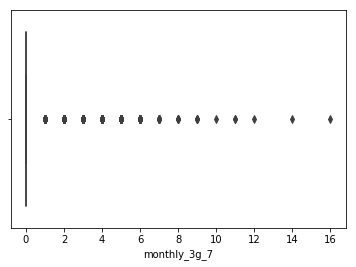

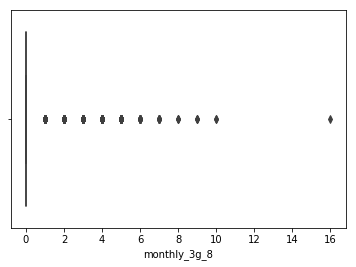

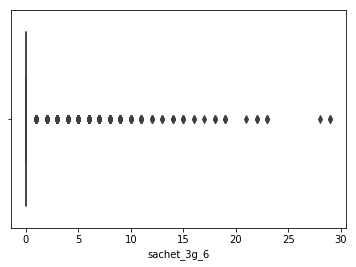

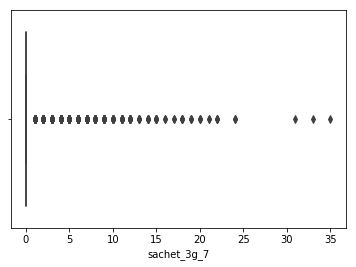

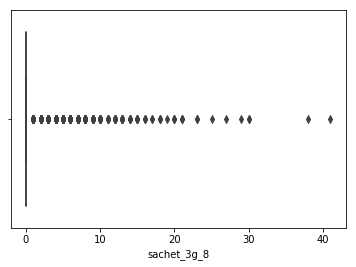

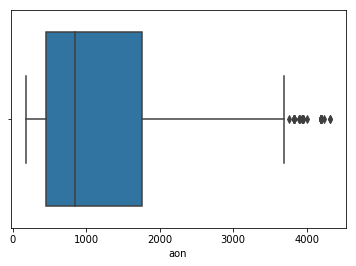

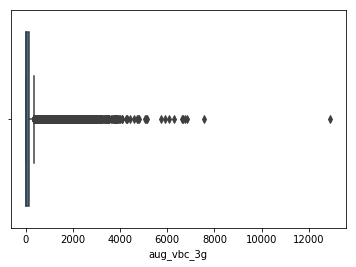

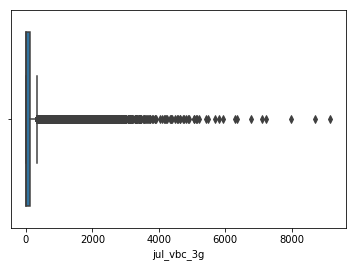

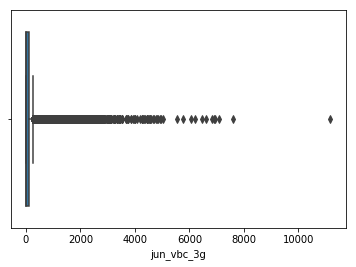

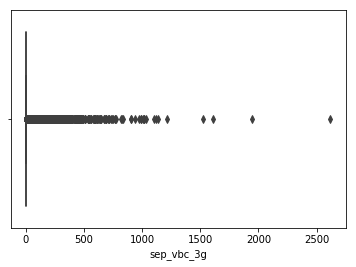

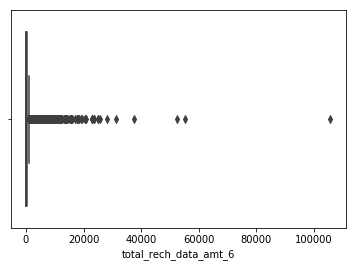

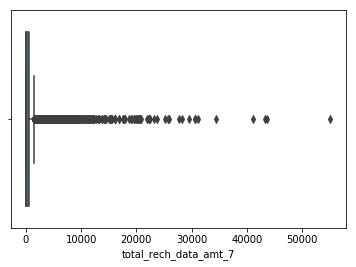

In [67]:
num_col=[]
for col in X.columns:
    if X[col].dtype=='int64' or X[col].dtype=='float64' :
            num_col.append(col)
            sns.boxplot(hv_customer_data[col])
            plt.show()
    

In [68]:
hv_customer_data['customer_churn'].dtype

dtype('int64')

In [69]:
obj_col=[]
for col in X.columns:
    if X[col].dtype=='object':
        obj_col.append(col)

In [70]:
obj_col

[]

As we can see from the above result that there are no object column

<b>Capping outlier

In [71]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            print('Not')
            df[col]=df[col]
    return df

hv_customer_data_updated=cap_data(hv_customer_data)


capping the  arpu_6


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Py

capping the  arpu_7
capping the  arpu_8
capping the  onnet_mou_6
capping the  onnet_mou_7
capping the  onnet_mou_8
capping the  offnet_mou_6
capping the  offnet_mou_7
capping the  offnet_mou_8
capping the  roam_ic_mou_6
capping the  roam_ic_mou_7
capping the  roam_ic_mou_8
capping the  roam_og_mou_6
capping the  roam_og_mou_7
capping the  roam_og_mou_8
capping the  loc_og_t2t_mou_6
capping the  loc_og_t2t_mou_7
capping the  loc_og_t2t_mou_8
capping the  loc_og_t2m_mou_6
capping the  loc_og_t2m_mou_7
capping the  loc_og_t2m_mou_8
capping the  loc_og_t2f_mou_6
capping the  loc_og_t2f_mou_7
capping the  loc_og_t2f_mou_8
capping the  loc_og_t2c_mou_6
capping the  loc_og_t2c_mou_7
capping the  loc_og_t2c_mou_8
capping the  loc_og_mou_6
capping the  loc_og_mou_7
capping the  loc_og_mou_8
capping the  std_og_t2t_mou_6
capping the  std_og_t2t_mou_7
capping the  std_og_t2t_mou_8
capping the  std_og_t2m_mou_6
capping the  std_og_t2m_mou_7
capping the  std_og_t2m_mou_8
capping the  std_og_t2f_mou

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hni7kor\AppData\

capping the  total_rech_num_8
capping the  total_rech_amt_6


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Py

capping the  total_rech_amt_7
capping the  total_rech_amt_8


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\

capping the  max_rech_amt_6
capping the  max_rech_amt_7


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Py

capping the  max_rech_amt_8
capping the  vol_2g_mb_6


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\

capping the  vol_2g_mb_7
capping the  vol_2g_mb_8
capping the  vol_3g_mb_6
capping the  vol_3g_mb_7
capping the  vol_3g_mb_8
capping the  monthly_2g_6


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hni7kor\AppData\

capping the  monthly_2g_7
capping the  monthly_2g_8


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hni7kor\AppData\Roaming\Python\P

capping the  sachet_2g_6
capping the  sachet_2g_7


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Py

capping the  sachet_2g_8
capping the  monthly_3g_6


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Py

capping the  monthly_3g_7
capping the  monthly_3g_8


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\

capping the  sachet_3g_6
capping the  sachet_3g_7


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Py

capping the  sachet_3g_8
capping the  aon


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Py

capping the  aug_vbc_3g
capping the  jul_vbc_3g


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


capping the  jun_vbc_3g
capping the  sep_vbc_3g
capping the  total_rech_data_amt_6
capping the  total_rech_data_amt_7
capping the  customer_churn


C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hni7kor\AppData\

In [72]:
hv_customer_data_updated.shape

(30001, 125)

In [73]:
#Seprating the dataset
X = hv_customer_data_updated.drop(['customer_churn'], axis=1)
Y=hv_customer_data_updated['customer_churn']

<h3>Top Features in our dataset

In [74]:
model_feature_selector = SelectFromModel(LogisticRegression(), max_features=20)
model_feature_selector.fit(X, Y)

model_support = model_feature_selector.get_support()
top_features = X.loc[:,model_support].columns.tolist()

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
#top features
top_features

['roam_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_mou_8',
 'std_ic_t2m_mou_7',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'vol_2g_mb_8',
 'sep_vbc_3g']

In [76]:
X_stats=hv_customer_data_updated[top_features]

<b>Scaling of dataset

In [77]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

<b>Train test split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)


Dimension of X_train: (21000, 124)
Dimension of X_test: (9001, 124)


<b>SMOTE

Applying SMOTE to make the dataset as balance

In [79]:
#SMOTE
sm = SMOTE(random_state = 2)
X_train_bal,y_train_bal = sm.fit_sample(X_train,y_train)

<b>Logistics Regression

In [194]:
#Logistics Regression
lm_model_simple=LogisticRegression(max_iter=5000)
lm_model_simple.fit(X_train_bal,y_train_bal)
pred=lm_model_simple.predict(X_test)
metrics.accuracy_score(y_test, pred)


0.8419064548383512

In [195]:
print('Accuracy Score :',accuracy_score(y_test, pred))
print('Report : ')
print(classification_report(y_test, pred))

Accuracy Score : 0.8419064548383512
Report : 
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8272
           1       0.31      0.80      0.45       729

    accuracy                           0.84      9001
   macro avg       0.65      0.82      0.68      9001
weighted avg       0.93      0.84      0.87      9001



In [196]:
results_lm = confusion_matrix(y_test, pred) 
  
print(results_lm)

[[6993 1279]
 [ 144  585]]


In [197]:
lm_model_simple.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

<b> Support Vector Machine

In [198]:
#SVM
svm_model_simple=SVC(kernel='linear')
svm_model_simple.fit(X_train_bal,y_train_bal)
pred_svm=lm_model_simple.predict(X_test)
metrics.accuracy_score(y_test, pred_svm)

0.8419064548383512

In [199]:
print('Accuracy Score :',accuracy_score(y_test, pred_svm))
print('Report : ')
print(classification_report(y_test, pred_svm))

Accuracy Score : 0.8419064548383512
Report : 
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8272
           1       0.31      0.80      0.45       729

    accuracy                           0.84      9001
   macro avg       0.65      0.82      0.68      9001
weighted avg       0.93      0.84      0.87      9001



In [200]:
results_svm = confusion_matrix(y_test, pred_svm) 
  
print(results_svm)

[[6993 1279]
 [ 144  585]]


In [201]:
svm_model_simple.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

<b>Random Forest

In [202]:
#Random Forest
rf_model_simple=RandomForestClassifier()
rf_model_simple.fit(X_train_bal,y_train_bal)
pred_rf=rf_model_simple.predict(X_test)
metrics.accuracy_score(y_test, pred_rf)

0.9321186534829463

In [203]:
print('Accuracy Score :',accuracy_score(y_test, pred_rf))
print('Report : ')
print(classification_report(y_test, pred_rf))

Accuracy Score : 0.9321186534829463
Report : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8272
           1       0.58      0.62      0.60       729

    accuracy                           0.93      9001
   macro avg       0.77      0.79      0.78      9001
weighted avg       0.93      0.93      0.93      9001



In [204]:
results_rf = confusion_matrix(y_test, pred_rf) 
  
print(results_rf)

[[7941  331]
 [ 280  449]]


In [205]:
rf_model_simple.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<b>XgBoost

In [206]:
#XGBoost
XGB_model_simple = XGBClassifier()
XGB_model_simple.fit(X_train_bal,y_train_bal)
pred_xgb = XGB_model_simple.predict(X_test)
metrics.accuracy_score(y_test, pred_xgb)

0.9104543939562271

In [207]:
print('Accuracy Score :',accuracy_score(y_test, pred_xgb))
print('Report : ')
print(classification_report(y_test, pred_xgb))

Accuracy Score : 0.9104543939562271
Report : 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8272
           1       0.47      0.72      0.57       729

    accuracy                           0.91      9001
   macro avg       0.72      0.82      0.76      9001
weighted avg       0.93      0.91      0.92      9001



In [208]:
results_xgb= confusion_matrix(y_test, pred_xgb)  
print(results_xgb)

[[7671  601]
 [ 205  524]]


In [209]:
XGB_model_simple.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

<h3>Statsmodel

In [193]:
#for top twenty features
log1 = st.GLM(Y,(st.add_constant(X_stats)), family = st.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         customer_churn   No. Observations:                30001
Model:                            GLM   Df Residuals:                    29980
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5570.5
Date:                Sun, 05 Jul 2020   Deviance:                       11141.
Time:                        22:34:55   Pearson chi2:                 4.27e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9682      0.059    -33.516      0.000      -2.083      -1.853
roam_og_mou_8        0.0042      0.000     14.799      0.000       0.004       0.005
std_og_t2t_mou_8    -0.0015      0.000     -3.178      0.001      -0.002      -0.001
std_og_t2m_mou_8    -0.0015      0.000     -3.128      0.002      -0.002      -0.001
std_og_mou_8         0.0013      0.000      2.974      0.003       0.000       0.002
isd_og_mou_6        -0.0021      0.001     -1.582      0.114      -0.005       0.001
isd_og_mou_8         0.0055      0.002      2.722      0.006       0.002       0.010
spl_og_mou_6        -0.0028      0.001     -2.140      0.032      -0.005      -0.000
spl_og_mou_8        -0.0026      0.002     -1.138      0.255      -0.007       0.002
og_others_8          0.0116      0.005      2.332      0.020       0.002       0.021
loc_ic_t2t_mou_6     0.0019      0.000      4.770      0.000       0.001       0.003
loc_ic_t2m_mou_6     0.0016      0.000      6.720      0.000       0.001       0.002
loc_ic_mou_8        -0.0079      0.000    -21.701      0.000      -0.009      -0.007
std_ic_t2m_mou_7    -0.0005      0.000     -1.396      0.163      -0.001       0.000
isd_ic_mou_8        -0.0003      0.001     -0.320      0.749      -0.002       0.002
ic_others_8          0.0004      0.004      0.084      0.933      -0.008       0.009
total_rech_num_6     0.0311      0.004      8.328      0.000       0.024       0.038
total_rech_num_7     0.0557      0.004     12.473      0.000       0.047       0.064
total_rech_num_8    -0.1184      0.006    -18.367      0.000      -0.131      -0.106
vol_2g_mb_8         -0.0025      0.000     -9.904      0.000      -0.003      -0.002
sep_vbc_3g          -0.0538      0.009     -5.700      0.000      -0.072      -0.035
====================================================================================
"""

<h3>Hyperparameter tuning

In [85]:
seed = 7
kfold = KFold(n_splits=5, random_state=seed)
model = LogisticRegression(max_iter=1000)
results = cross_val_score(model, X, Y, cv=kfold)
#print("Accuracy: Final mean:%.3f%%, Final standard deviation:

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [86]:
results

array([0.93567739, 0.9425    , 0.939     , 0.94033333, 0.93416667])

<b>Logistics Regression with hyper parameter tuning

In [222]:
#Hyperparameter tuning

params = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga'], 'class_weight':[1,2]}

gridlog = GridSearchCV(LogisticRegression(), params, cv=10, n_jobs=4, scoring='roc_auc')
gridlog.fit(X_train_bal, y_train_bal)


C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [1, 2], 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='roc_auc')

In [223]:
print('Logistic Regression parameters: ', gridlog.best_params_)

Logistic Regression parameters:  {'C': 1000, 'class_weight': 2, 'dual': False, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'saga'}


In [225]:
lm_model_opt=LogisticRegression(C= 1000, dual= False, fit_intercept= True, penalty= 'l2', max_iter=0, solver='saga',class_weight=2)
lm_model_opt.fit(X_train_bal,y_train_bal)
pred_lm_opt=lm_model_opt.predict(X_test)
metrics.accuracy_score(y_test, pred_lm_opt)

0.9190089990001111

In [245]:
print('Accuracy Score :',accuracy_score(y_test, pred_lm_opt))
print('Report : ')
print(classification_report(y_test, pred_lm_opt))

Accuracy Score : 0.9190089990001111
Report : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8272
           1       0.00      0.00      0.00       729

    accuracy                           0.92      9001
   macro avg       0.46      0.50      0.48      9001
weighted avg       0.84      0.92      0.88      9001



C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [246]:
results_opt_lm= confusion_matrix(y_test, pred_lm_opt)  
print(results_opt_lm)

[[8272    0]
 [ 729    0]]


As we can see the accuracy got increased from 0.84 to 0.91

<b>Random Forest with hyper parameter tuning

In [228]:
param_grid = { 
    'n_estimators': [200, 700, 900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [229]:
rf_model_opt = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

gridrf=GridSearchCV(estimator=rf_model_opt, param_grid=param_grid, cv= 5)
gridrf.fit(X_train_bal, y_train_bal)

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700, 900]})

In [230]:
print('Random Forest parameters: ', gridrf.best_params_)

Random Forest parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 700}


In [231]:
rf_model_opt=RandomForestClassifier(max_features='log2', n_estimators=900,bootstrap=True,criterion='gini')
rf_model_opt.fit(X_train_bal,y_train_bal)
pred_rf_opt=rf_model_opt.predict(X_test)
metrics.accuracy_score(y_test, pred_rf_opt)

0.93222975224975

In [232]:
print('Accuracy Score :',accuracy_score(y_test, pred_rf_opt))
print('Report : ')
print(classification_report(y_test, pred_rf_opt))

Accuracy Score : 0.93222975224975
Report : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8272
           1       0.58      0.60      0.59       729

    accuracy                           0.93      9001
   macro avg       0.77      0.78      0.78      9001
weighted avg       0.93      0.93      0.93      9001



In [233]:
results_opt_rf= confusion_matrix(y_test, pred_rf_opt)  
print(results_opt_rf)

[[7950  322]
 [ 288  441]]


In [234]:
rf_model_opt.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 900,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

As we can see from the above result that there is slight increase in the accuracy of Random Forest model

In [80]:
X_lab = hv_customer_data_updated.drop(['customer_churn'], axis=1)
Y_lab=hv_customer_data_updated['customer_churn']

<h3>Principal Component Analysis[PCA])

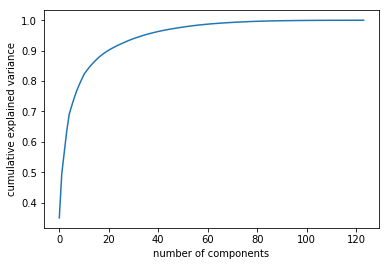

In [210]:
pca = PCA().fit(X_train_bal)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As we can see from the above result that with 40 components we are getting variance of more than 90 percent

In [211]:
pca = PCA(n_components = 40) 
  
X_train_pca = pca.fit_transform(X_train_bal) 
X_test_pca = pca.transform(X_test) 

In [212]:
#Logistics Regression
lm_model_pca=LogisticRegression(C= 0.1, dual= False, fit_intercept= True, penalty= 'l2', max_iter=0, solver='saga',class_weight=1)
lm_model_pca.fit(X_train_pca,y_train_bal)
pred_pca=lm_model_pca.predict(X_test_pca)
metrics.accuracy_score(y_test, pred_pca)


0.9190089990001111

In [213]:
print('Accuracy Score :',accuracy_score(y_test, pred_pca))
print('Report : ')
print(classification_report(y_test, pred_pca))

Accuracy Score : 0.9190089990001111
Report : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8272
           1       0.00      0.00      0.00       729

    accuracy                           0.92      9001
   macro avg       0.46      0.50      0.48      9001
weighted avg       0.84      0.92      0.88      9001



C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
results_opt_lm_pca= confusion_matrix(y_test, pred_pca)  
print(results_opt_lm_pca)

[[8272    0]
 [ 729    0]]


In [215]:
lm_model_pca.get_params()

{'C': 0.1,
 'class_weight': 1,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 0,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [216]:
#Hyperparameter tuning

params = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga'], 'class_weight':[1,2]}

gridlog = GridSearchCV(LogisticRegression(), params, cv=10, n_jobs=4, scoring='roc_auc')
gridlog.fit(X_train_pca, y_train_bal)


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [1, 2], 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='roc_auc')

In [217]:
print('Logistic Regression parameters: ', gridlog.best_params_)

Logistic Regression parameters:  {'C': 1, 'class_weight': 2, 'dual': False, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga'}


In [218]:
lm_model_pca=LogisticRegression(C= 1, dual= False, fit_intercept= True, penalty= 'l2', max_iter=0, solver='saga',class_weight=1)
lm_model_pca.fit(X_train_pca,y_train_bal)
pred_pca=lm_model_pca.predict(X_test_pca)
metrics.accuracy_score(y_test, pred_pca)


0.9190089990001111

In [219]:
lm_model_pca.get_params()

{'C': 1,
 'class_weight': 1,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 0,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

<b>Random Forest with PCA

In [235]:
param_grid1 = { 
    'n_estimators': [200, 700, 900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
}

In [236]:
rf_model_pca = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

gridrf_pca=GridSearchCV(estimator=rf_model_pca, param_grid=param_grid1, cv= 5)
gridrf_pca.fit(X_train_pca, y_train_bal)

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700, 900]})

In [237]:
print('Random Forest parameters: ', gridrf_pca.best_params_)

Random Forest parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 900}


In [238]:
#Random Forest
rf_model_pca=RandomForestClassifier(max_features='log2', n_estimators=1200,bootstrap=True,criterion='entropy')
rf_model_pca.fit(X_train_pca,y_train_bal)
pred_rf_pca=rf_model_pca.predict(X_test_pca)
metrics.accuracy_score(y_test, pred_rf_pca)

0.9174536162648594

In [239]:
print('Accuracy Score :',accuracy_score(y_test, pred_rf_pca))
print('Report : ')
print(classification_report(y_test, pred_rf_pca))

Accuracy Score : 0.9174536162648594
Report : 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8272
           1       0.49      0.56      0.52       729

    accuracy                           0.92      9001
   macro avg       0.73      0.75      0.74      9001
weighted avg       0.92      0.92      0.92      9001



In [240]:
results_opt_rf_pca= confusion_matrix(y_test, pred_rf_pca)  
print(results_opt_rf_pca)

[[7851  421]
 [ 322  407]]


In [241]:
rf_model_pca.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [242]:
param_grid2 = { 
    'min_samples_split': range(100, 500, 25),
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
}


In [243]:
rf_model_pca = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

gridrf_pca=GridSearchCV(estimator=rf_model_pca, param_grid=param_grid2, cv= 5)
gridrf_pca.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(100, 500, 25)})

In [244]:
print('Random Forest parameters: ', gridrf_pca.best_params_)

Random Forest parameters:  {'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 100}


In [245]:
#Random Forest
rf_model_pca=RandomForestClassifier(max_depth=10,min_samples_leaf=25,min_samples_split=100,n_estimators=1200,bootstrap=True)
rf_model_pca.fit(X_train_pca,y_train_bal)
pred_rf_pca=rf_model_pca.predict(X_test_pca)
metrics.accuracy_score(y_test, pred_rf_pca)

0.8739028996778135

In [246]:
rf_model_pca.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 25,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<b>Xgboost with PCA and hyperparameter tuning

In [220]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
grid_search_opt = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
grid_search_opt.fit(X_train_pca,y_train_bal)
print(grid_search_opt.best_params_)

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'gamma': 0.3}


In [221]:
xg_opt_pca=XGBClassifier( learning_rate =0.1, n_estimators=1400, max_depth=20,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27, 
  scoring='roc_auc',n_jobs=4,iid=False)

In [222]:
xg_opt_pca.fit(X_train_pca,y_train_bal)

XGBClassifier(colsample_bytree=0.8, iid=False, max_depth=20, min_child_weight=2,
              n_estimators=1400, n_jobs=4, nthread=4, scoring='roc_auc',
              seed=27, subsample=0.8)

In [223]:
pred_opt_xg_pca=xg_opt_pca.predict(X_test_pca)

In [224]:
metrics.accuracy_score(y_test, pred_opt_xg_pca)

0.920453282968559

In [225]:
print('Accuracy Score :',accuracy_score(y_test, pred_opt_xg_pca))
print('Report : ')
print(classification_report(y_test, pred_opt_xg_pca))

Accuracy Score : 0.920453282968559
Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8272
           1       0.51      0.53      0.52       729

    accuracy                           0.92      9001
   macro avg       0.73      0.74      0.74      9001
weighted avg       0.92      0.92      0.92      9001



In [226]:
results_opt_xg_pca= confusion_matrix(y_test, pred_opt_xg_pca)  
print(results_opt_xg_pca)

[[7902  370]
 [ 346  383]]


In [227]:
xg_opt_pca.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 20,
 'min_child_weight': 2,
 'missing': None,
 'n_estimators': 1400,
 'n_jobs': 4,
 'nthread': 4,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': None,
 'subsample': 0.8,
 'verbosity': 1,
 'scoring': 'roc_auc',
 'iid': False}

As we can see that the accuracy for the Xgboost model got increase from 0.91 to 0.92

We are using Random Forest model with tuned one inorder to created predicted dataframe as the model is giving highest accuracy among all the models

In [319]:
y_test['preds']=pred_rf_opt

As we can see that the accuracy for the Xgboost model got increase from 0.91 to 0.92

In [317]:
Filter_df  = copy_data[copy_data.index.isin(y_test.index)]

In [320]:
Filter_df['Churn_Prediction']=y_test['preds']

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [322]:
#Report for the user on which prediction was done
Filter_df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,Churn_Prediction
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN,0
57,7001682585,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1201.298,...,3106,1799.09,3649.39,1892.32,0.00,5244.0,655.0,455.0,755.0,0
67,7000800341,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,NaN,218.818,...,1158,126.21,745.73,1010.15,0.00,252.0,455.0,NaN,NaN,0
77,7001328263,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,30.000,...,1894,0.00,0.00,0.00,0.00,0.0,154.0,NaN,NaN,0
91,7000160837,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,4.000,...,707,0.00,0.00,0.00,0.00,0.0,833.0,833.0,1001.0,0
101,7001746121,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,512.524,...,359,0.00,0.00,0.00,0.00,125.0,154.0,1356.0,894.0,0
102,7001631060,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,451.375,...,1727,0.00,0.00,0.00,0.00,154.0,198.0,368.0,207.0,0
103,7002236431,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,883.401,...,902,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,0
105,7000208415,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,659.587,...,467,65.85,6.46,0.00,0.00,252.0,145.0,404.0,862.0,0


We are using Random Forest model with tuned one inorder to created predicted dataframe as the model is giving highest accuracy among all the models

Top Features for the Model

"roam_og_mou_8, std_og_t2t_mou_8, std_og_t2m_mou_8, std_og_mou_8, isd_og_mou_8, spl_og_mou_6, og_others_8,
loc_ic_t2t_mou_6, loc_ic_t2m_mou_6, loc_ic_mou_8, total_rech_num_6, total_rech_num_7, total_rech_num_8, 
vol_2g_mb_8, sep_vbc_3g"